In [1]:
%load_ext autoreload
%autoreload 2
# Set-up: Import numpy and assign GPU


import os
os.environ['TRANSFORMERS_CACHE'] = '/local/helenl/.cache/'
os.environ['PYTORCH_TRANSFORMERS_CACHE'] = '/local/helenl/.cache/'

import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from tqdm.notebook import tqdm

from gpu_utils import restrict_GPU_pytorch
from helenl_utils import *

restrict_GPU_pytorch('1')

Using GPU:1


In [2]:
full_dataset = get_dataset(dataset="civilcomments", download=False, root_dir = './wilds/data')

In [3]:
len(full_dataset) # entire Amazon dataset has 4,002,170 inputs

448000

In [7]:
eval_dataset = get_eval_dataset("civilcomments", "ERM")

char_min: 1
word_p: 0.1


In [9]:
len(eval_dataset)

133782

In [8]:
type(full_dataset[1][1])

torch.Tensor

In [10]:
labels = []
metadata = []
for review in full_dataset:
    label = review[1]
    metadatum = review[2]
    
    label = label.cpu().detach().numpy()
    metadatum = metadatum.cpu().detach().numpy()
    
    labels.append(label)
    metadata.append(metadatum)

In [11]:
unique, counts = np.unique(labels, return_counts=True)

In [13]:
counts

array([397206,  50794])

/local/helenl/.conda/envs/tta/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

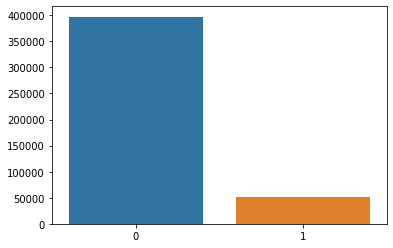

In [12]:
sns.barplot(unique, counts)

In [14]:
unique, counts = np.unique(metadata, return_counts=True)

In [17]:
unique, counts

(array([0, 1]), array([6814103,  801897]))

/local/helenl/.conda/envs/tta/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

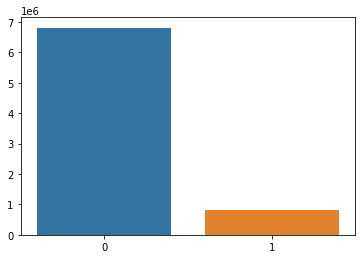

In [16]:
sns.barplot(unique, counts)

In [ ]:
labels = np.asarray(labels)
metadata = np.asarray(metadata)